### Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load & Read the Data

In [2]:
df=pd.read_excel('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\data-for-time-series\\shampoo_sales.xlsx')
df.head()

,Month,Sales
0,2019-01-01,266.0
1,2019-02-01,145.9
2,2019-03-01,183.1
3,2019-04-01,119.3
4,2019-05-01,180.3


In [3]:
# shape
df.shape

(36, 2)

In [4]:
# size
df.size

72

In [5]:
# columns
df.columns

Index(['Month', 'Sales'], dtype='object')

In [6]:
# data types
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [7]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [8]:
# statistical measures
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [9]:
# missing values
df.isna().sum()

Month    0
Sales    0
dtype: int64

### Plot Sales

In [3]:
df.rename({'Month':'Date'}, axis=1, inplace=True)
df.set_index('Date', inplace=True)
df.head()

,Sales
Date,
2019-01-01,266.0
2019-02-01,145.9
2019-03-01,183.1
2019-04-01,119.3
2019-05-01,180.3


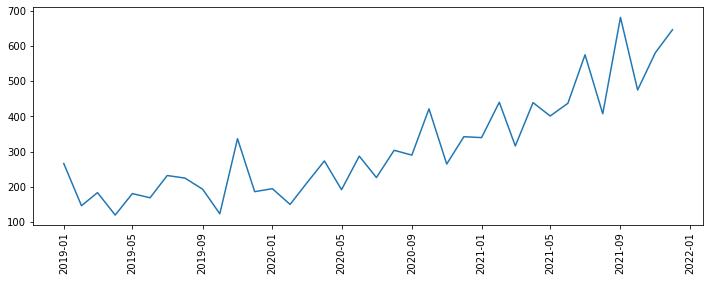

In [11]:
plt.figure(figsize=(12,4))
plt.plot(df)
plt.xticks(rotation=90);

* Trend is present but no Seasonality.

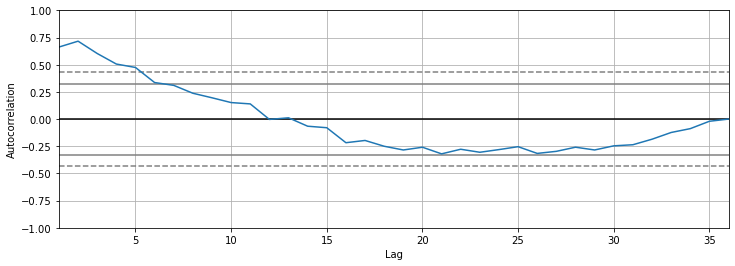

In [12]:
plt.figure(figsize=(12,4))
pd.plotting.autocorrelation_plot(df);

### ACF & PACF plot

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

<Figure size 864x288 with 0 Axes>

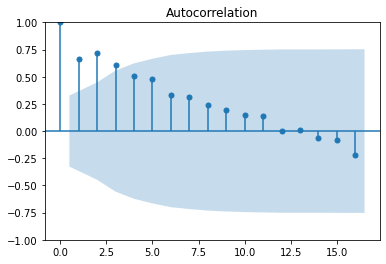

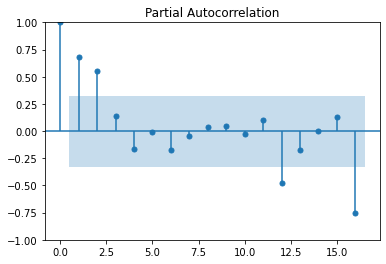

In [14]:
plt.figure(figsize=(12,4))
plot_acf(df), plot_pacf(df)

* From auto correlation graph we get p value AR model
* From Partial auto correlation graph we get q value MA model

In [4]:
train=df[:30]
test=df[30:]
print(train.shape, test.shape)

(30, 1) (6, 1)


## Time Series Models

### 1. Naive Method

In [5]:
train_len=len(train)
train_len

30

In [6]:
naive=test.copy()
naive['naive_forecast']=train['Sales'][train_len-1]
naive

,Sales,naive_forecast
Date,,
2021-07-01,575.5,437.4
2021-08-01,407.6,437.4
2021-09-01,682.0,437.4
2021-10-01,475.3,437.4
2021-11-01,581.3,437.4
2021-12-01,646.9,437.4


#### Plot train test & naive forecast

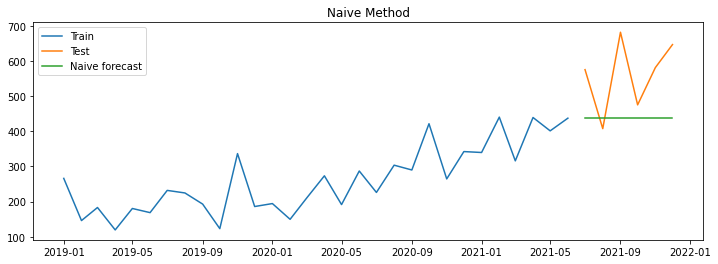

In [7]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(naive['naive_forecast'], label='Naive forecast')
plt.legend()
plt.title('Naive Method');

In [8]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.9,22.05


* RMSE is too high.

### 2. Simple Moving method

In [9]:
avg=test.copy()
avg['simp_avg_forecast']=train['Sales'].mean()
avg

,Sales,simp_avg_forecast
Date,,
2021-07-01,575.5,262.833333
2021-08-01,407.6,262.833333
2021-09-01,682.0,262.833333
2021-10-01,475.3,262.833333
2021-11-01,581.3,262.833333
2021-12-01,646.9,262.833333


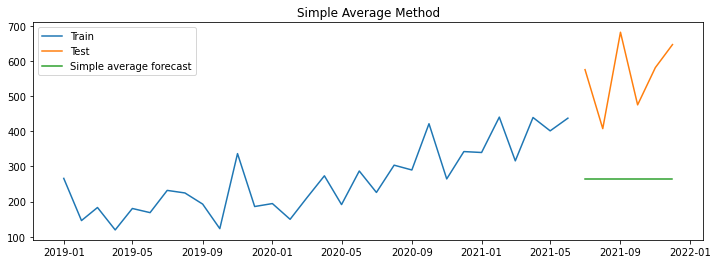

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(avg['simp_avg_forecast'], label='Simple average forecast')
plt.legend()
plt.title('Simple Average Method');

In [11]:
rmse = np.sqrt(mean_squared_error(test['Sales'], avg['simp_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-avg['simp_avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69


* RMSE is higher than Naive Method.

### 3. Simple Moving Average Method

In [12]:
sma = df.copy()
sma['sma_forecast'] = df['Sales'].rolling(window=12).mean()
sma['sma_forecast'][train_len:] = sma['sma_forecast'][train_len-1]
sma

,Sales,sma_forecast
Date,,
2019-01-01,266.0,NaN
2019-02-01,145.9,NaN
2019-03-01,183.1,NaN
2019-04-01,119.3,NaN
2019-05-01,180.3,NaN
2019-06-01,168.5,NaN
2019-07-01,231.8,NaN
2019-08-01,224.5,NaN
2019-09-01,192.8,NaN


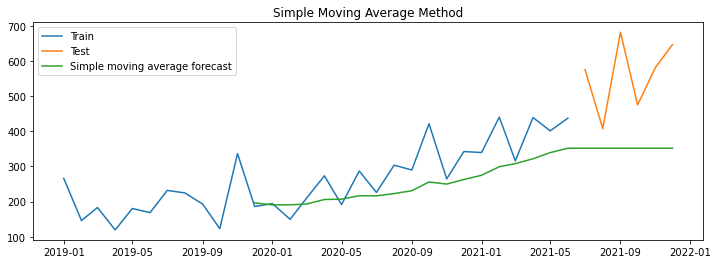

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(sma['sma_forecast'], label='Simple moving average forecast')
plt.legend()
plt.title('Simple Moving Average Method');

In [13]:
rmse = np.sqrt(mean_squared_error(test['Sales'], sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34


* RMSE is better than Simple average method but not good as compare to Naive Method.

### 4. Simple Exponential smoothing

In [14]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
simp_expo= test.copy()
simp_expo['simp_expo_forecast'] = model_fit.forecast(len(test))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


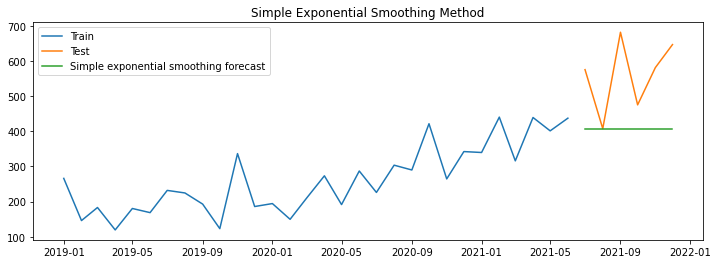

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(simp_expo['simp_expo_forecast'], label='Simple exponential smoothing forecast')
plt.legend()
plt.title('Simple Exponential Smoothing Method');

In [15]:
rmse = np.sqrt(mean_squared_error(test['Sales'], simp_expo['simp_expo_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-simp_expo['simp_expo_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53


* This method is better than Simple average & Simple moving average method, Performing close to Naive Method.

### 5. Holt's method with Trend

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
holt_trend = test.copy()
holt_trend['holt_trend_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.19741531647570967, 'smoothing_trend': 0.19741531635863224, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 172.4873333102201, 'initial_trend': -0.11133506196534998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


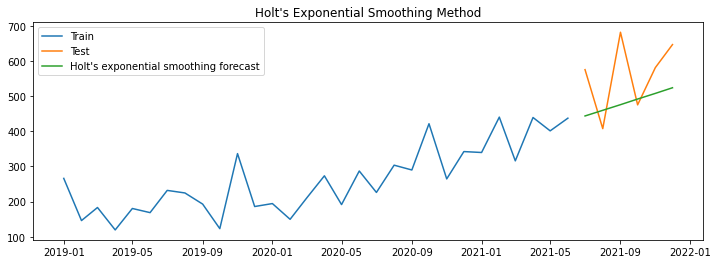

In [30]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(holt_trend['holt_trend_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend()
plt.title('Holt\'s Exponential Smoothing Method');

In [17]:
rmse = np.sqrt(mean_squared_error(test['Sales'], holt_trend['holt_trend_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-holt_trend['holt_trend_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84


* This method is performing better as compare to all previous methods.

### 6. Holt Winters additive method with trend & Seasonality

In [18]:
hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
hwa['hwa_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2261997071867322, 'smoothing_trend': 0.2260696109953008, 'smoothing_seasonal': 0.05142907248621627, 'damping_trend': nan, 'initial_level': 188.77602489641825, 'initial_trend': -2.6105635788793, 'initial_seasons': array([ 14.50623844, -14.90412136, -31.49973559,   0.45498335,
       -28.71626363,   1.70661504,  -0.70511973,  27.50985257,
        -3.37012708,  17.80690165,  36.12156427, -10.31588768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


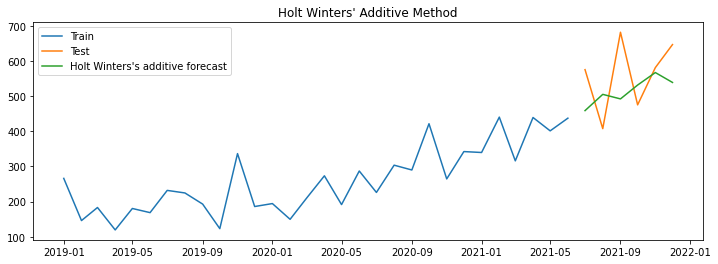

In [33]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(hwa['hwa_forecast'], label='Holt Winters\'s additive forecast')
plt.legend()
plt.title('Holt Winters\' Additive Method');

In [19]:
rmse = np.sqrt(mean_squared_error(test['Sales'], hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-hwa['hwa_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84
0,Holt Winters' additive method,111.15,17.16


RMSE of this method is better than previous all other methods except Holts exponential smoothing method.

### 7. Holt Winters multiplicative method with trend & Seasonality

In [20]:
hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
hwm['hwm_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.22729450505756402, 'smoothing_trend': 0.2192762885566378, 'smoothing_seasonal': 0.060891141662512846, 'damping_trend': nan, 'initial_level': 122.15904977324965, 'initial_trend': -2.4900777606549642, 'initial_seasons': array([1.63081508, 1.60591761, 1.30071266, 1.6225832 , 1.40895948,
       1.54827733, 1.4873248 , 1.75766886, 1.53775125, 1.86539421,
       1.6255058 , 1.5250405 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


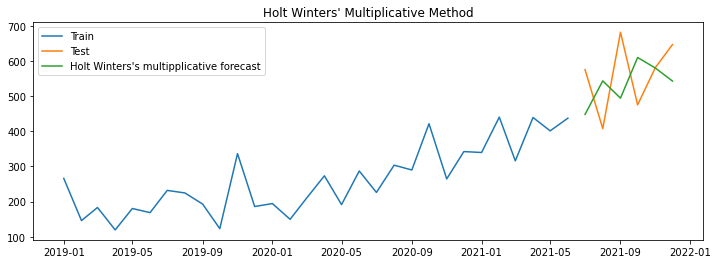

In [36]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(hwm['hwm_forecast'], label='Holt Winters\'s multipplicative forecast')
plt.legend()
plt.title('Holt Winters\' Multiplicative Method');

In [21]:
rmse = np.sqrt(mean_squared_error(test['Sales'], hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-hwm['hwm_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84
0,Holt Winters' additive method,111.15,17.16
0,Holt Winters' multiplicative method,128.37,21.27


* RMSE of this method is good as compare to previous all methods except Holts exponential smoothing & Holt winters additive method..

**Here We conclude from above table that Holt's exponential smoothing method is preffered to forecast beause the RMSE and MAPE values for this method are lower as compared to other methods. This method is very well able to capture the trend and seasonality in the data.**

## Auto Regressive Methods

**Stationarity Check**
##### KPSS Method

In [51]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.752776
Critical Values @ 0.05: 0.46
p-value: 0.010000


p-value is not greater than 0.05 hence series is not stationary.

**Series is not stationary, to make it stationary perform transformation & differencing.**

#### Box Cox transformation to make variance constant.

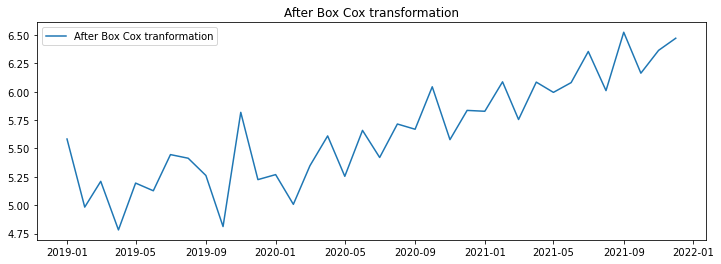

In [52]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df['Sales'], lmbda=0), index = df.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend()
plt.title('After Box Cox transformation');

#### Use Differencing to remove Trend

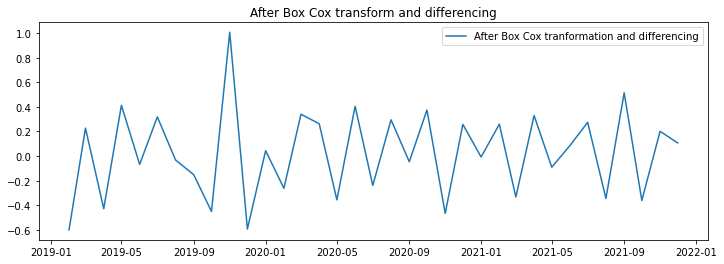

In [53]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df.index).dropna()
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend()
plt.title('After Box Cox transform and differencing');

* Trend is gone.

In [41]:
data_boxcox_diff

Date
2019-02-01   -0.600575
2019-03-01    0.227111
2019-04-01   -0.428391
2019-05-01    0.412981
2019-06-01   -0.067686
2019-07-01    0.318939
2019-08-01   -0.031999
2019-09-01   -0.152222
2019-10-01   -0.450282
2019-11-01    1.007227
2019-12-01   -0.593389
2020-01-01    0.044194
2020-02-01   -0.262107
2020-03-01    0.340287
2020-04-01    0.262986
2020-05-01   -0.356205
2020-06-01    0.405117
2020-07-01   -0.238947
2020-08-01    0.295176
2020-09-01   -0.046175
2020-10-01    0.374521
2020-11-01   -0.466216
2020-12-01    0.257846
2021-01-01   -0.007625
2021-02-01    0.259621
2021-03-01   -0.332258
2021-04-01    0.329757
2021-05-01   -0.090473
2021-06-01    0.086139
2021-07-01    0.274391
2021-08-01   -0.344953
2021-09-01    0.514743
2021-10-01   -0.361083
2021-11-01    0.201321
2021-12-01    0.106925
dtype: float64

#### Now Check whether Series is stationary or not

In [54]:
warnings.filterwarnings('ignore')
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.150726
Critical Values @ 0.05: 0.46
p-value: 0.100000


* Now the p-value is greater than 0.05. Hence Series is **Stationary**.

In [71]:
#Train test Split
print(train.tail())
print(test)

            Sales
Date             
2021-02-01  440.4
2021-03-01  315.9
2021-04-01  439.3
2021-05-01  401.3
2021-06-01  437.4
            Sales
Date             
2021-07-01  575.5
2021-08-01  407.6
2021-09-01  682.0
2021-10-01  475.3
2021-11-01  581.3
2021-12-01  646.9


### 8. Auto Regression(AR) method

In [25]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train,order=(1,0,0))
model_fit = model.fit()
forcast_AR=model_fit.predict(start=len(train), end=len(df)-1)
forcast_AR

2021-07-01    366.683953
2021-08-01    325.884017
2021-09-01    302.344313
2021-10-01    288.762977
2021-11-01    280.927165
2021-12-01    276.406258
Freq: MS, Name: predicted_mean, dtype: float64

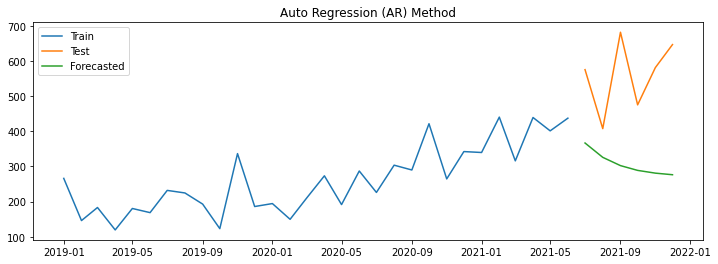

In [76]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_AR, label="Forecasted")
plt.legend()
plt.title("Auto Regression (AR) Method");

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
rmse=np.sqrt(mean_squared_error(test,forcast_AR)).round(2)
mape=mean_absolute_percentage_error(test,forcast_AR).round(2)*100

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84
0,Holt Winters' additive method,111.15,17.16
0,Holt Winters' multiplicative method,128.37,21.27
0,Autoregressive (AR) method,275.89,43.00


* RMSE is high so we dont use this model to forecast.

### 9. Moving average method (MA)

In [27]:
model=sm.tsa.arima.ARIMA(train,order=(0,0,1))
model_fit = model.fit()
forcast_MA=model_fit.predict(start=len(train), end=len(df)-1)
forcast_MA

2021-07-01    306.199723
2021-08-01    264.517788
2021-09-01    264.517788
2021-10-01    264.517788
2021-11-01    264.517788
2021-12-01    264.517788
Freq: MS, Name: predicted_mean, dtype: float64

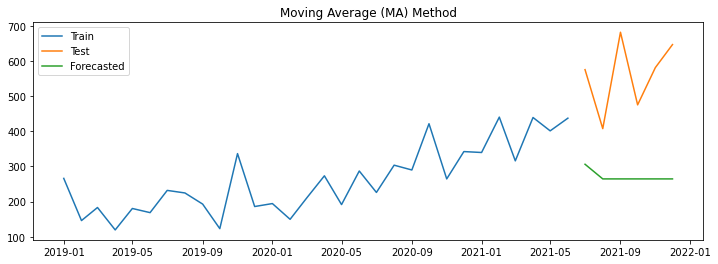

In [85]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_MA, label="Forecasted")
plt.legend()
plt.title("Moving Average (MA) Method");

In [28]:
rmse=np.sqrt(mean_squared_error(test,forcast_MA)).round(2)
mape=mean_absolute_percentage_error(test,forcast_MA).round(2)*100

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84
0,Holt Winters' additive method,111.15,17.16
0,Holt Winters' multiplicative method,128.37,21.27
0,Autoregressive (AR) method,275.89,43.00
0,Moving Average (MA) method,305.04,50.00


* This model is not good to forecast.

### 10. Auto regression moving average method (ARMA)

In [29]:
model=sm.tsa.arima.ARIMA(train,order=(1,0,1))
model_fit = model.fit()
forcast_ARMA=model_fit.predict(start=len(train), end=len(df)-1)
forcast_ARMA

2021-07-01    396.021209
2021-08-01    391.763487
2021-09-01    387.673883
2021-10-01    383.745760
2021-11-01    379.972741
2021-12-01    376.348702
Freq: MS, Name: predicted_mean, dtype: float64

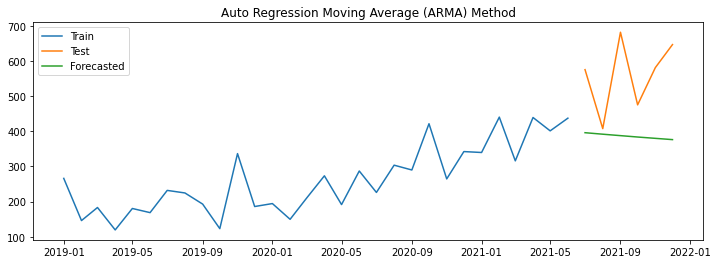

In [88]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_ARMA, label="Forecasted")
plt.legend()
plt.title("Auto Regression Moving Average (ARMA) Method");

In [30]:
rmse=np.sqrt(mean_squared_error(test,forcast_ARMA)).round(2)
mape=mean_absolute_percentage_error(test,forcast_ARMA).round(2)*100

tempResults = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84
0,Holt Winters' additive method,111.15,17.16
0,Holt Winters' multiplicative method,128.37,21.27
0,Autoregressive (AR) method,275.89,43.00
0,Moving Average (MA) method,305.04,50.00
0,ARMA,200.50,29.00


* ARMA model is better than AR & MA.

### 10. Auto regressive integrated moving average (ARIMA)

In [31]:
model=sm.tsa.arima.ARIMA(train,order=(1,1,1))
model_fit = model.fit()
forcast_ARIMA=model_fit.predict(start=len(train), end=len(df)-1)
forcast_ARIMA

2021-07-01    406.875552
2021-08-01    421.912724
2021-09-01    414.505005
2021-10-01    418.154249
2021-11-01    416.356532
2021-12-01    417.242136
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
rmse=np.sqrt(mean_squared_error(test,forcast_ARIMA)).round(2)
rmse

174.84

* RMSE is high, we can alter the p,d,q values to get better results.

##### Lets Choose right p, d, q values

In [121]:
warnings.filterwarnings('ignore')

import itertools
p=range(0,8)
q=range(0,8)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
len(pdq)

128

In [122]:
rmse=[]
order1=[]
for pdq in pdq:
    try:
        model=sm.tsa.arima.ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=len(df)-1)
        error=np.sqrt(mean_squared_error(pred,test))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [123]:
order=pd.DataFrame(data=rmse, index=order1, columns=['RMSE'])
order.round()

,RMSE
"(0, 0, 0)",313.0
"(0, 0, 1)",305.0
"(0, 0, 2)",297.0
"(0, 0, 3)",306.0
"(0, 0, 4)",286.0
...,...
"(7, 1, 3)",147.0
"(7, 1, 4)",136.0
"(7, 1, 5)",149.0
"(7, 1, 6)",156.0


In [124]:
pd.pivot_table(order, values='RMSE', index=order.index, aggfunc=min).sort_values(by='RMSE', ascending=True)[:5].round()

,RMSE
"(4, 0, 7)",109.0
"(6, 1, 7)",121.0
"(4, 1, 4)",125.0
"(2, 0, 7)",126.0
"(5, 1, 4)",129.0


* RMSE is 109 when p=4, d=0, q=7. Hence Use this Paramenter to train the model.

In [33]:
model=sm.tsa.arima.ARIMA(train,order=(4,0,7))
model_fit = model.fit()
forecast_ARIMA=model_fit.predict(start=len(train), end=len(df)-1)
forecast_ARIMA

2021-07-01    508.991449
2021-08-01    476.886771
2021-09-01    468.293427
2021-10-01    506.741924
2021-11-01    535.452368
2021-12-01    529.687982
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'Auto Regression Integraed Moving Average (ARIMA) Method')

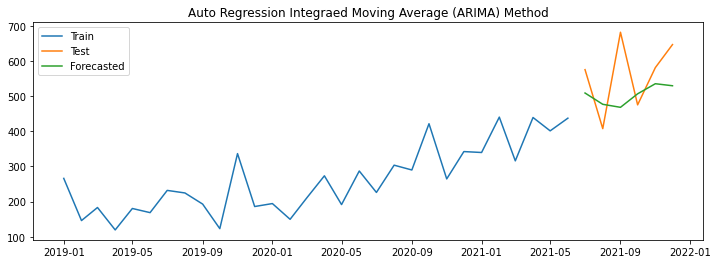

In [129]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast_ARIMA, label="Forecasted")
plt.legend()
plt.title("Auto Regression Integraed Moving Average (ARIMA) Method")

In [34]:
rmse=np.sqrt(mean_squared_error(test,forecast_ARIMA)).round(2)
mape=mean_absolute_percentage_error(test,forecast_ARIMA).round(2)*100

tempResults = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84
0,Holt Winters' additive method,111.15,17.16
0,Holt Winters' multiplicative method,128.37,21.27
0,Autoregressive (AR) method,275.89,43.00
0,Moving Average (MA) method,305.04,50.00
0,ARMA,200.50,29.00


* After hyperparameter tunning This method's performanace is best amongs all.

### 12. Seasonal auto regressive integrated moving average (SARIMA)

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
forcast_SARIMA=model_fit.predict(start=len(train), end=len(df)-1)
forcast_SARIMA

2021-07-01    445.247695
2021-08-01    471.319460
2021-09-01    443.892991
2021-10-01    427.619465
2021-11-01    546.430200
2021-12-01    434.876185
Freq: MS, Name: predicted_mean, dtype: float64

#### To choose better values of order & seasonal_order use itertool method.

Text(0.5, 1.0, 'Seasonal Auto Regression Integraed Moving Average (SARIMA) Method')

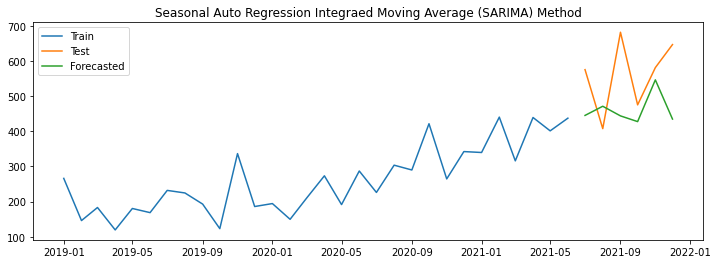

In [41]:
plt.figure(figsize=(12,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forcast_SARIMA, label="Forecasted")
plt.legend()
plt.title("Seasonal Auto Regression Integraed Moving Average (SARIMA) Method")

In [42]:
rmse=np.sqrt(mean_squared_error(test,forcast_SARIMA)).round(2)
mape=mean_absolute_percentage_error(test,forcast_SARIMA).round(2)*100

tempResults = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,155.90,22.05
0,Simple average method,313.18,51.69
0,Simple moving average forecast,229.90,35.34
0,Simple exponential smoothing forecast,182.55,25.53
0,Holt's exponential smoothing method,117.88,16.84
0,Holt Winters' additive method,111.15,17.16
0,Holt Winters' multiplicative method,128.37,21.27
0,Autoregressive (AR) method,275.89,43.00
0,Moving Average (MA) method,305.04,50.00
0,ARMA,200.50,29.00


* SARIMA model can be preffered.

**Conclusion** : **Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:**

**1. Auto regressive integrated moving average (ARIMA) technique.**

**2. Holt Winters' additive method.**

**3. Holt's exponential smoothing method**

**are the best for forecasting the sales for the data.**

**Above all three methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data.**